In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [43]:
df1 = pd.read_csv('gender_submission.csv')

In [45]:
df1.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [49]:
df1.isnull().sum()

PassengerId    0
Survived       0
dtype: int64

In [61]:
df1.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
413    False
414    False
415    False
416    False
417    False
Length: 418, dtype: bool

In [63]:
df2 = pd.read_csv('test.csv')

In [154]:
df2.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


In [69]:
df2.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [75]:
df2.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
413    False
414    False
415    False
416    False
417    False
Length: 418, dtype: bool

In [89]:
# Removing missing values from df2 column Age and cabin

df2.dropna(axis=1, thresh=0.5*len(df2), inplace=True)

In [93]:
df2.dropna(inplace=True)

In [95]:
df2.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [77]:
df3 = pd.read_csv('train.csv')

In [79]:
df3.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [81]:
df3.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [97]:
# Removing missing values from df3 column age and cabin

df3.dropna(axis = 1, thresh = 0.5*len(df3), inplace=True)

In [180]:
df3.dropna(inplace=True)

In [103]:
df3.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [85]:
df3.duplicated().sum()

0

In [105]:
# Merging the data df1 & df2

merge = df1.merge(df2)  # default inner join

In [170]:
# Changing the Gender column into binomial values

merge['Sex'] = merge['Sex'].map({'male':1, 'female':0})

In [178]:
merge

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,S
2,894,0,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,Q
3,895,0,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,12.2875,S
...,...,...,...,...,...,...,...,...,...,...,...
326,1301,1,3,"Peacock, Miss. Treasteall",0,3.0,1,1,SOTON/O.Q. 3101315,13.7750,S
327,1303,1,1,"Minahan, Mrs. William Edward (Lillian E Thorpe)",0,37.0,1,0,19928,90.0000,Q
328,1304,1,3,"Henriksson, Miss. Jenny Lovisa",0,28.0,0,0,347086,7.7750,S
329,1306,1,1,"Oliva y Ocana, Dona. Fermina",0,39.0,0,0,PC 17758,108.9000,C


In [111]:
# Merging the data df1, df2 & df3

final_merge = merge.merge(df3)

In [121]:
final_merge.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked


In [182]:
df3['Sex'] = df3['Sex'].map({'male':1, 'female':0})

In [288]:
df3

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",0,39.0,0,5,382652,29.1250,Q
886,887,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,112053,30.0000,S
889,890,1,1,"Behr, Mr. Karl Howell",1,26.0,0,0,111369,30.0000,C


In [186]:
df3.describe().round()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
count,712.0,712.0,712.0,712.0,712.0,712.0,712.0,712.0
mean,449.0,0.0,2.0,1.0,30.0,1.0,0.0,35.0
std,259.0,0.0,1.0,0.0,14.0,1.0,1.0,53.0
min,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
25%,223.0,0.0,1.0,0.0,20.0,0.0,0.0,8.0
50%,445.0,0.0,2.0,1.0,28.0,0.0,0.0,16.0
75%,677.0,1.0,3.0,1.0,38.0,1.0,1.0,33.0
max,891.0,1.0,3.0,1.0,80.0,5.0,6.0,512.0


In [188]:
merge.describe().round()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
count,331.0,331.0,331.0,331.0,331.0,331.0,331.0,331.0
mean,1100.0,0.0,2.0,1.0,30.0,0.0,0.0,41.0
std,123.0,0.0,1.0,0.0,14.0,1.0,1.0,61.0
min,892.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
25%,992.0,0.0,1.0,0.0,21.0,0.0,0.0,8.0
50%,1100.0,0.0,2.0,1.0,27.0,0.0,0.0,16.0
75%,1210.0,1.0,3.0,1.0,39.0,1.0,1.0,41.0
max,1307.0,1.0,3.0,1.0,76.0,8.0,6.0,512.0


In [190]:
merge.value_counts()

PassengerId  Survived  Pclass  Name                                    Sex  Age   SibSp  Parch  Ticket              Fare     Embarked
892          0         3       Kelly, Mr. James                        1    34.5  0      0      330911              7.8292   Q           1
1186         0         3       Wittevrongel, Mr. Camille               1    36.0  0      0      345771              9.5000   S           1
1183         1         3       Daly, Miss. Margaret Marcella Maggie""  0    30.0  0      0      382650              6.9500   Q           1
1179         0         1       Snyder, Mr. John Pillsbury              1    24.0  1      0      21228               82.2667  S           1
1177         0         3       Dennis, Mr. William                     1    36.0  0      0      A/5 21175           7.2500   S           1
                                                                                                                                        ..
1029         0         2       S

In [192]:
df3.value_counts()

PassengerId  Survived  Pclass  Name                                             Sex  Age    SibSp  Parch  Ticket       Fare      Embarked
1            0         3       Braund, Mr. Owen Harris                          1    22.00  1      0      A/5 21171    7.2500    S           1
622          1         1       Kimball, Mr. Edwin Nelson Jr                     1    42.00  1      0      11753        52.5542   S           1
595          0         2       Chapman, Mr. John Henry                          1    37.00  1      0      SC/AH 29037  26.0000   S           1
596          0         3       Van Impe, Mr. Jean Baptiste                      1    36.00  1      1      345773       24.1500   S           1
598          0         3       Johnson, Mr. Alfred                              1    49.00  0      0      LINE         0.0000    S           1
                                                                                                                                            ..
298 

In [194]:
merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 331 entries, 0 to 330
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  331 non-null    int64  
 1   Survived     331 non-null    int64  
 2   Pclass       331 non-null    int64  
 3   Name         331 non-null    object 
 4   Sex          331 non-null    int64  
 5   Age          331 non-null    float64
 6   SibSp        331 non-null    int64  
 7   Parch        331 non-null    int64  
 8   Ticket       331 non-null    object 
 9   Fare         331 non-null    float64
 10  Embarked     331 non-null    object 
dtypes: float64(2), int64(6), object(3)
memory usage: 28.6+ KB


In [196]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Survived     712 non-null    int64  
 2   Pclass       712 non-null    int64  
 3   Name         712 non-null    object 
 4   Sex          712 non-null    int64  
 5   Age          712 non-null    float64
 6   SibSp        712 non-null    int64  
 7   Parch        712 non-null    int64  
 8   Ticket       712 non-null    object 
 9   Fare         712 non-null    float64
 10  Embarked     712 non-null    object 
dtypes: float64(2), int64(6), object(3)
memory usage: 66.8+ KB


In [198]:
merge.shape

(331, 11)

In [200]:
df3.shape

(712, 11)

In [202]:
merge['Sex'].value_counts()

Sex
1    204
0    127
Name: count, dtype: int64

In [204]:
df3['Sex'].value_counts()

Sex
1    453
0    259
Name: count, dtype: int64

In [306]:
merge['Sex'] = merge['Sex'].map({'male':1,'female':0})

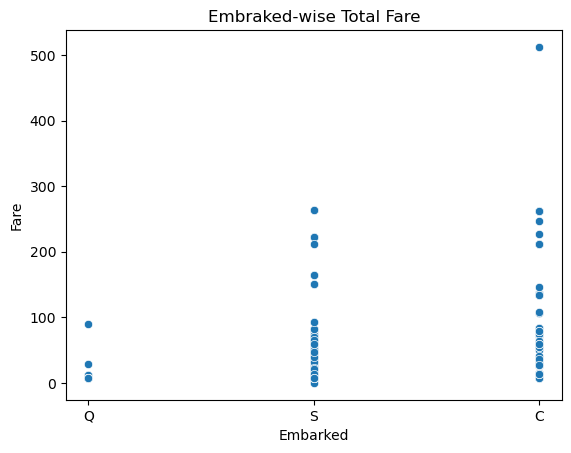

In [314]:
# Scatterplot visulization

sns.scatterplot(x = 'Embarked', y = 'Fare', data=merge)
plt.title('Embraked-wise Total Fare')
plt.show()

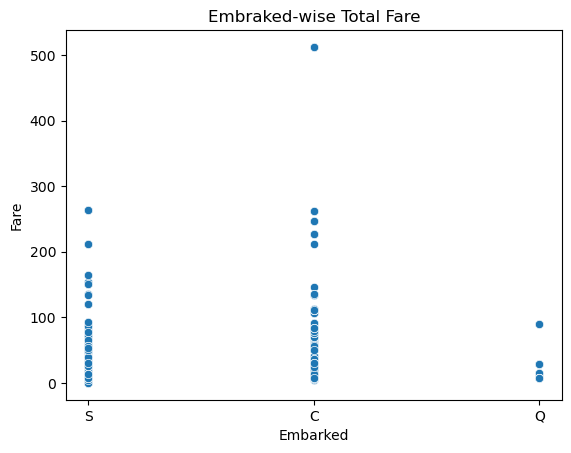

In [318]:
# Scatterplot for df3 dataset

sns.scatterplot(x = 'Embarked', y = 'Fare', data=df3)
plt.title('Embraked-wise Total Fare')
plt.show()

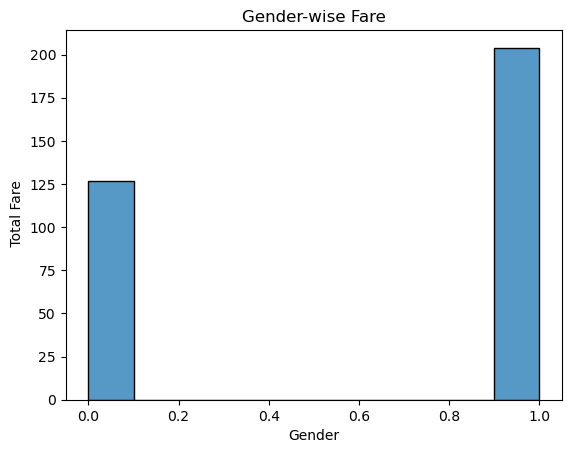

In [324]:
sns.histplot(merge['Sex'], bins=10)
plt.title('Gender-wise Fare')
plt.xlabel('Gender')
plt.ylabel('Total Fare')
plt.show()

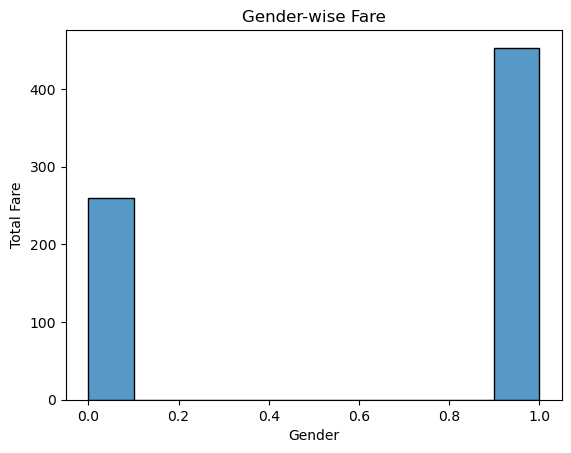

In [322]:
# Histogram graph for df3 datset

sns.histplot(df3['Sex'], bins=10)
plt.title('Gender-wise Fare')
plt.xlabel('Gender')
plt.ylabel('Total Fare')
plt.show()

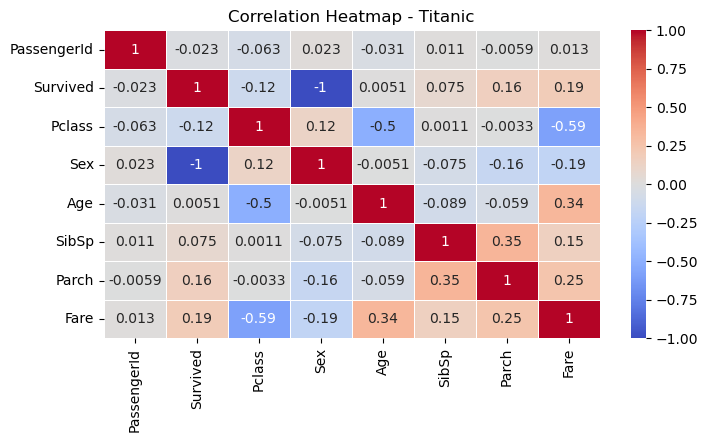

In [360]:
# Plot the heatmap for merge dataset

numeric_df = merge.select_dtypes(include = 'number')
corr_matrix = numeric_df

plt.figure(figsize=(8, 4))
sns.heatmap(corr_matrix.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap - Titanic')
plt.show()

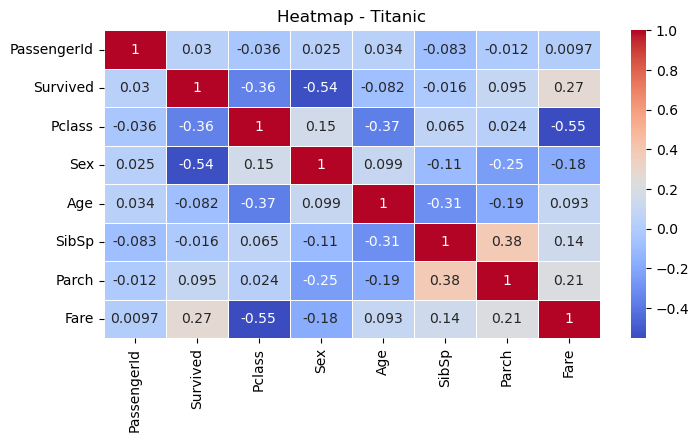

In [362]:
# Plot heatmap for df3 dataset

numeric_df = df3.select_dtypes(include='number')
matrix = numeric_df

plt.figure(figsize=(8, 4))
sns.heatmap(matrix.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Heatmap - Titanic")
plt.show()

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_8068\493365287.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x= 'Survived', y='Pclass', data=merge, palette='Set1')


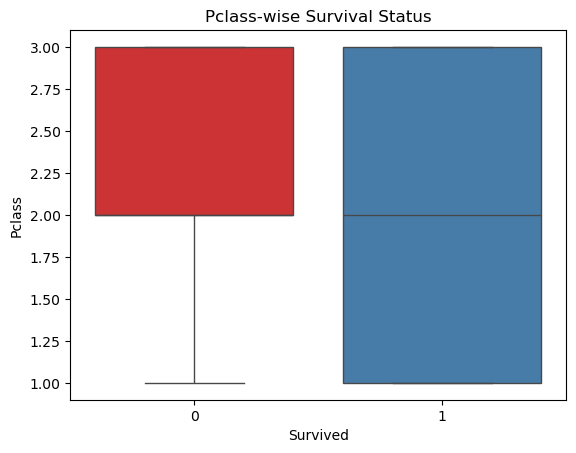

In [350]:
# survival status pclass

sns.boxplot(x= 'Survived', y='Pclass', data=merge, palette='Set1')
plt.title('Pclass-wise Survival Status')
plt.show()

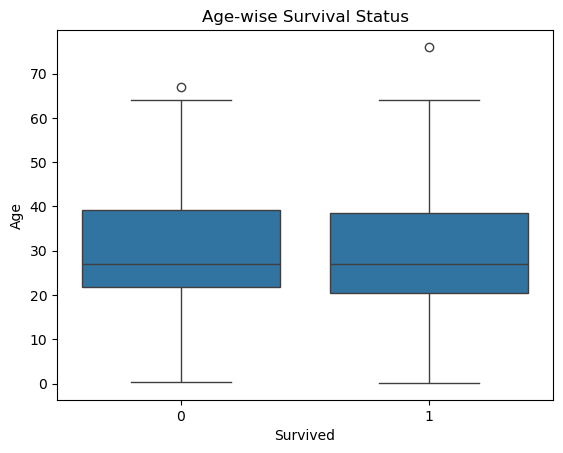

In [358]:

sns.boxplot(x= 'Survived', y='Age', data=merge)
plt.title('Age-wise Survival Status')
plt.show()